# Load the loss values on subsets

In [1]:
data_sizes = ['5000', '10000', '20000', '37067', 'shuffled_10000']

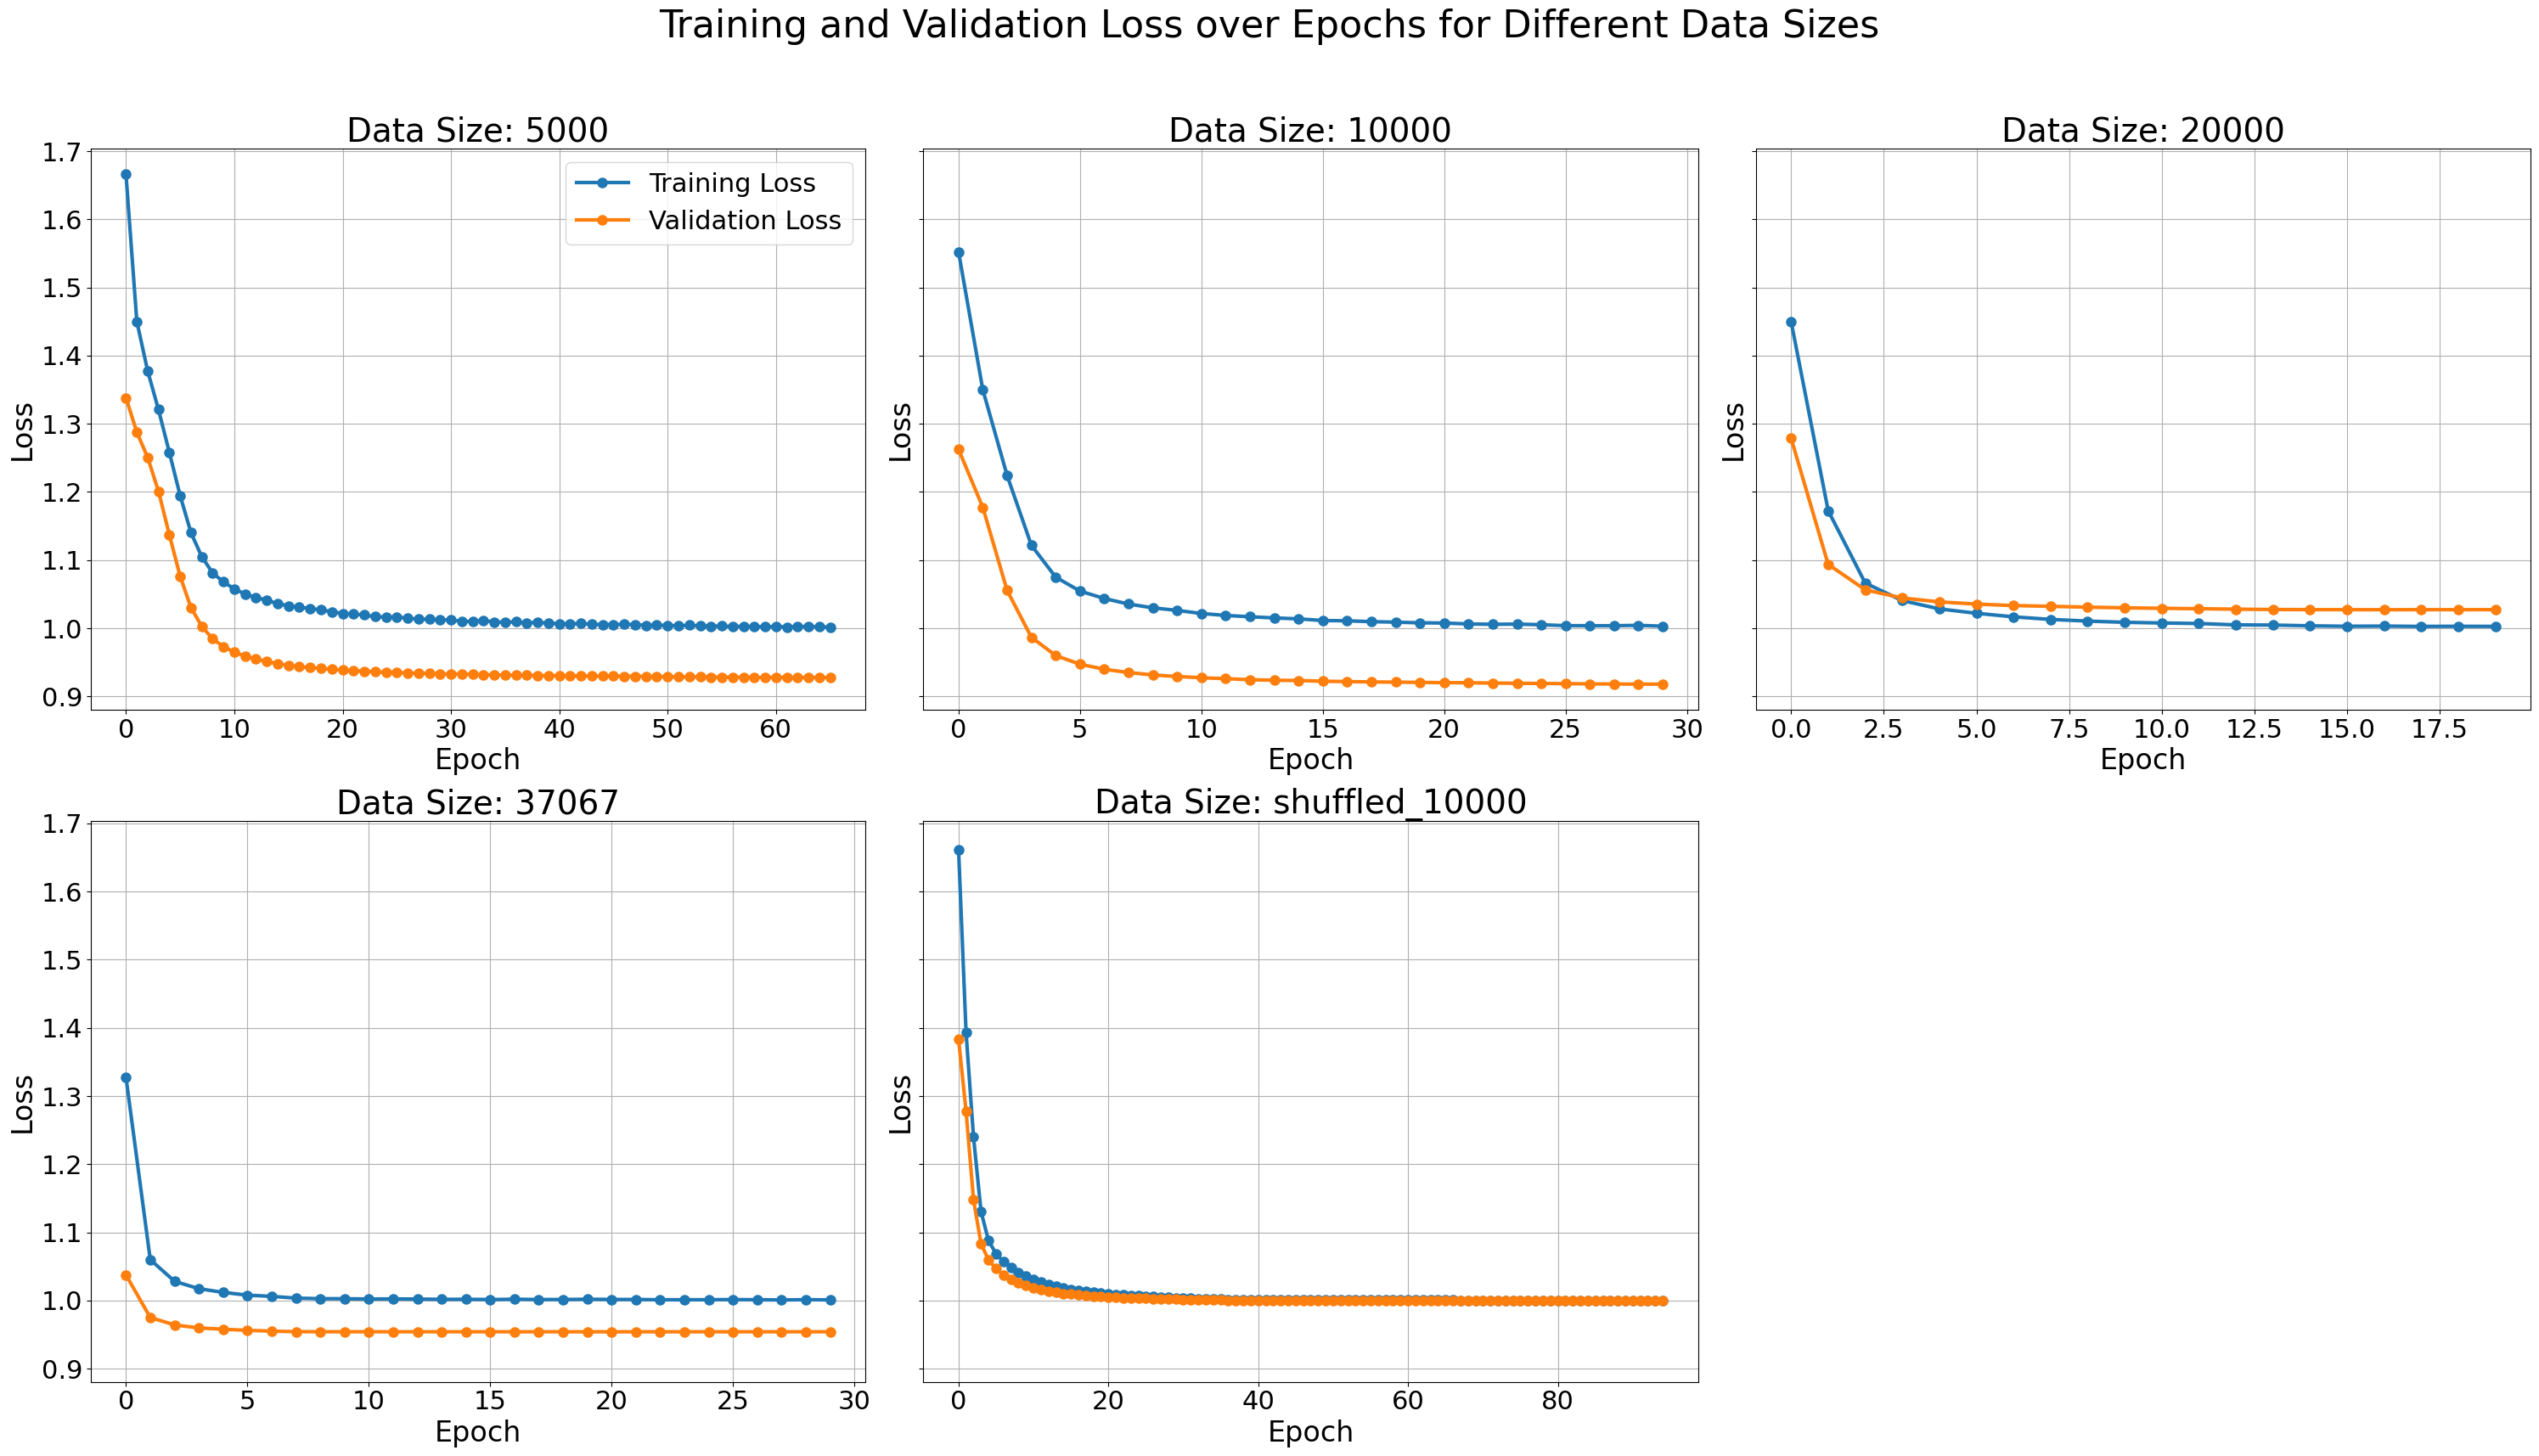

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data sizes to consider
data_sizes = ['5000', '10000', '20000', '37067', 'shuffled_10000']

# Create subplots for each data size
fig, axes = plt.subplots(2, 3, figsize=(30, 18), sharey=True)
fig.suptitle('Training and Validation Loss over Epochs for Different Data Sizes', fontsize=32)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each data size and create a subplot
for i, data_size in enumerate(data_sizes):
    # Assume each data size has a separate version directory
    file_path = f"lightning_logs/v2_m1_vae_{data_size}/version_0/metrics.csv"
    df_logs = pd.read_csv(file_path)

    # Extract relevant columns
    epochs = df_logs['epoch'].unique()  # Get unique epoch values
    train_loss = df_logs['train_loss'].dropna()  # Drop NaN values for train loss
    val_loss = df_logs['val_loss'].dropna()      # Drop NaN values for validation loss

    # Plot on the corresponding axis
    ax = axes[i]
    ax.plot(epochs[:len(train_loss)], train_loss, label='Training Loss', marker='o', markersize=8, linewidth=3)
    ax.plot(epochs[:len(val_loss)], val_loss, label='Validation Loss', marker='o', markersize=8, linewidth=3)
    ax.set_title(f'Data Size: {data_size}', fontsize=28)
    ax.set_xlabel('Epoch', fontsize=24)
    ax.set_ylabel('Loss', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True)
    if i == 0:
        ax.legend(fontsize=22)  # Add legend only to the first subplot

# Hide any unused subplots
for j in range(len(data_sizes), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


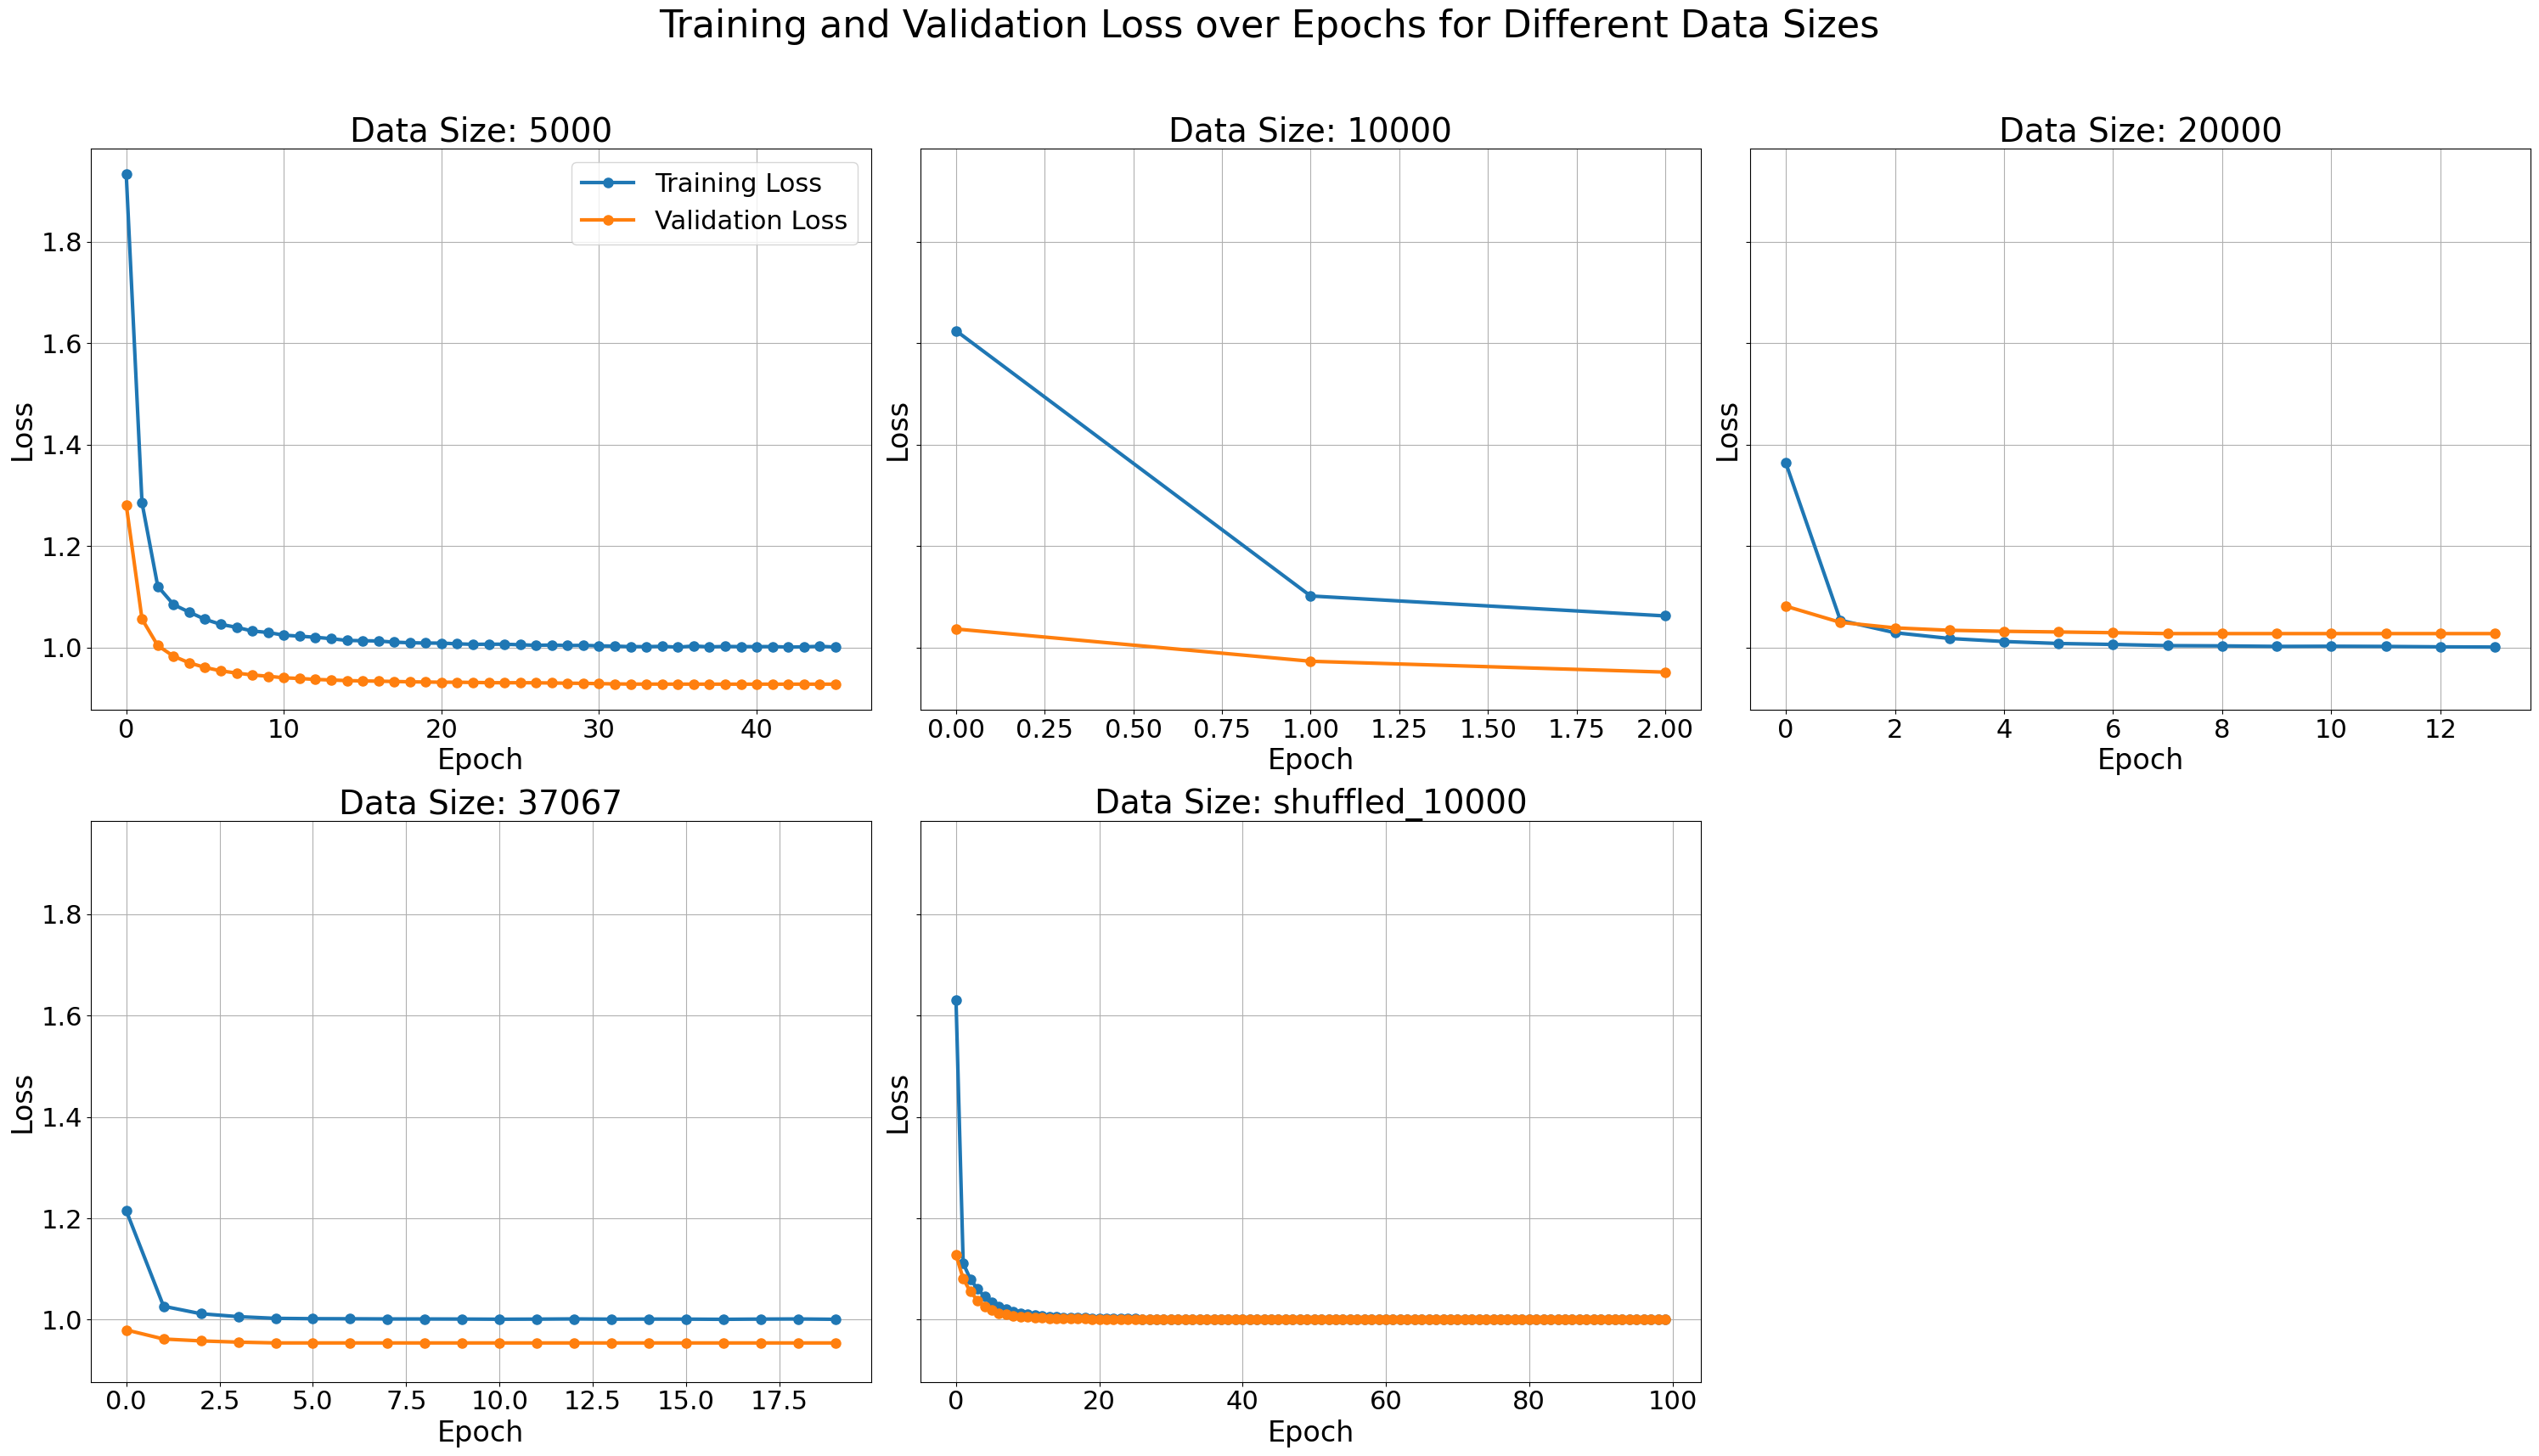

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Data sizes to consider
data_sizes = ['5000', '10000', '20000', '37067', 'shuffled_10000']

# Create subplots for each data size
fig, axes = plt.subplots(2, 3, figsize=(30, 18), sharey=True)
fig.suptitle('Training and Validation Loss over Epochs for Different Data Sizes', fontsize=32)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each data size and create a subplot
for i, data_size in enumerate(data_sizes):
    # Assume each data size has a separate version directory
    file_path = f"lightning_logs/v2_m1_vae_{data_size}/version_1/metrics.csv"
    df_logs = pd.read_csv(file_path)

    # Extract relevant columns
    epochs = df_logs['epoch'].unique()  # Get unique epoch values
    train_loss = df_logs['train_loss'].dropna()  # Drop NaN values for train loss
    val_loss = df_logs['val_loss'].dropna()      # Drop NaN values for validation loss

    # Plot on the corresponding axis
    ax = axes[i]
    ax.plot(epochs[:len(train_loss)], train_loss, label='Training Loss', marker='o', markersize=8, linewidth=3)
    ax.plot(epochs[:len(val_loss)], val_loss, label='Validation Loss', marker='o', markersize=8, linewidth=3)
    ax.set_title(f'Data Size: {data_size}', fontsize=28)
    ax.set_xlabel('Epoch', fontsize=24)
    ax.set_ylabel('Loss', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True)
    if i == 0:
        ax.legend(fontsize=22)  # Add legend only to the first subplot

# Hide any unused subplots
for j in range(len(data_sizes), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


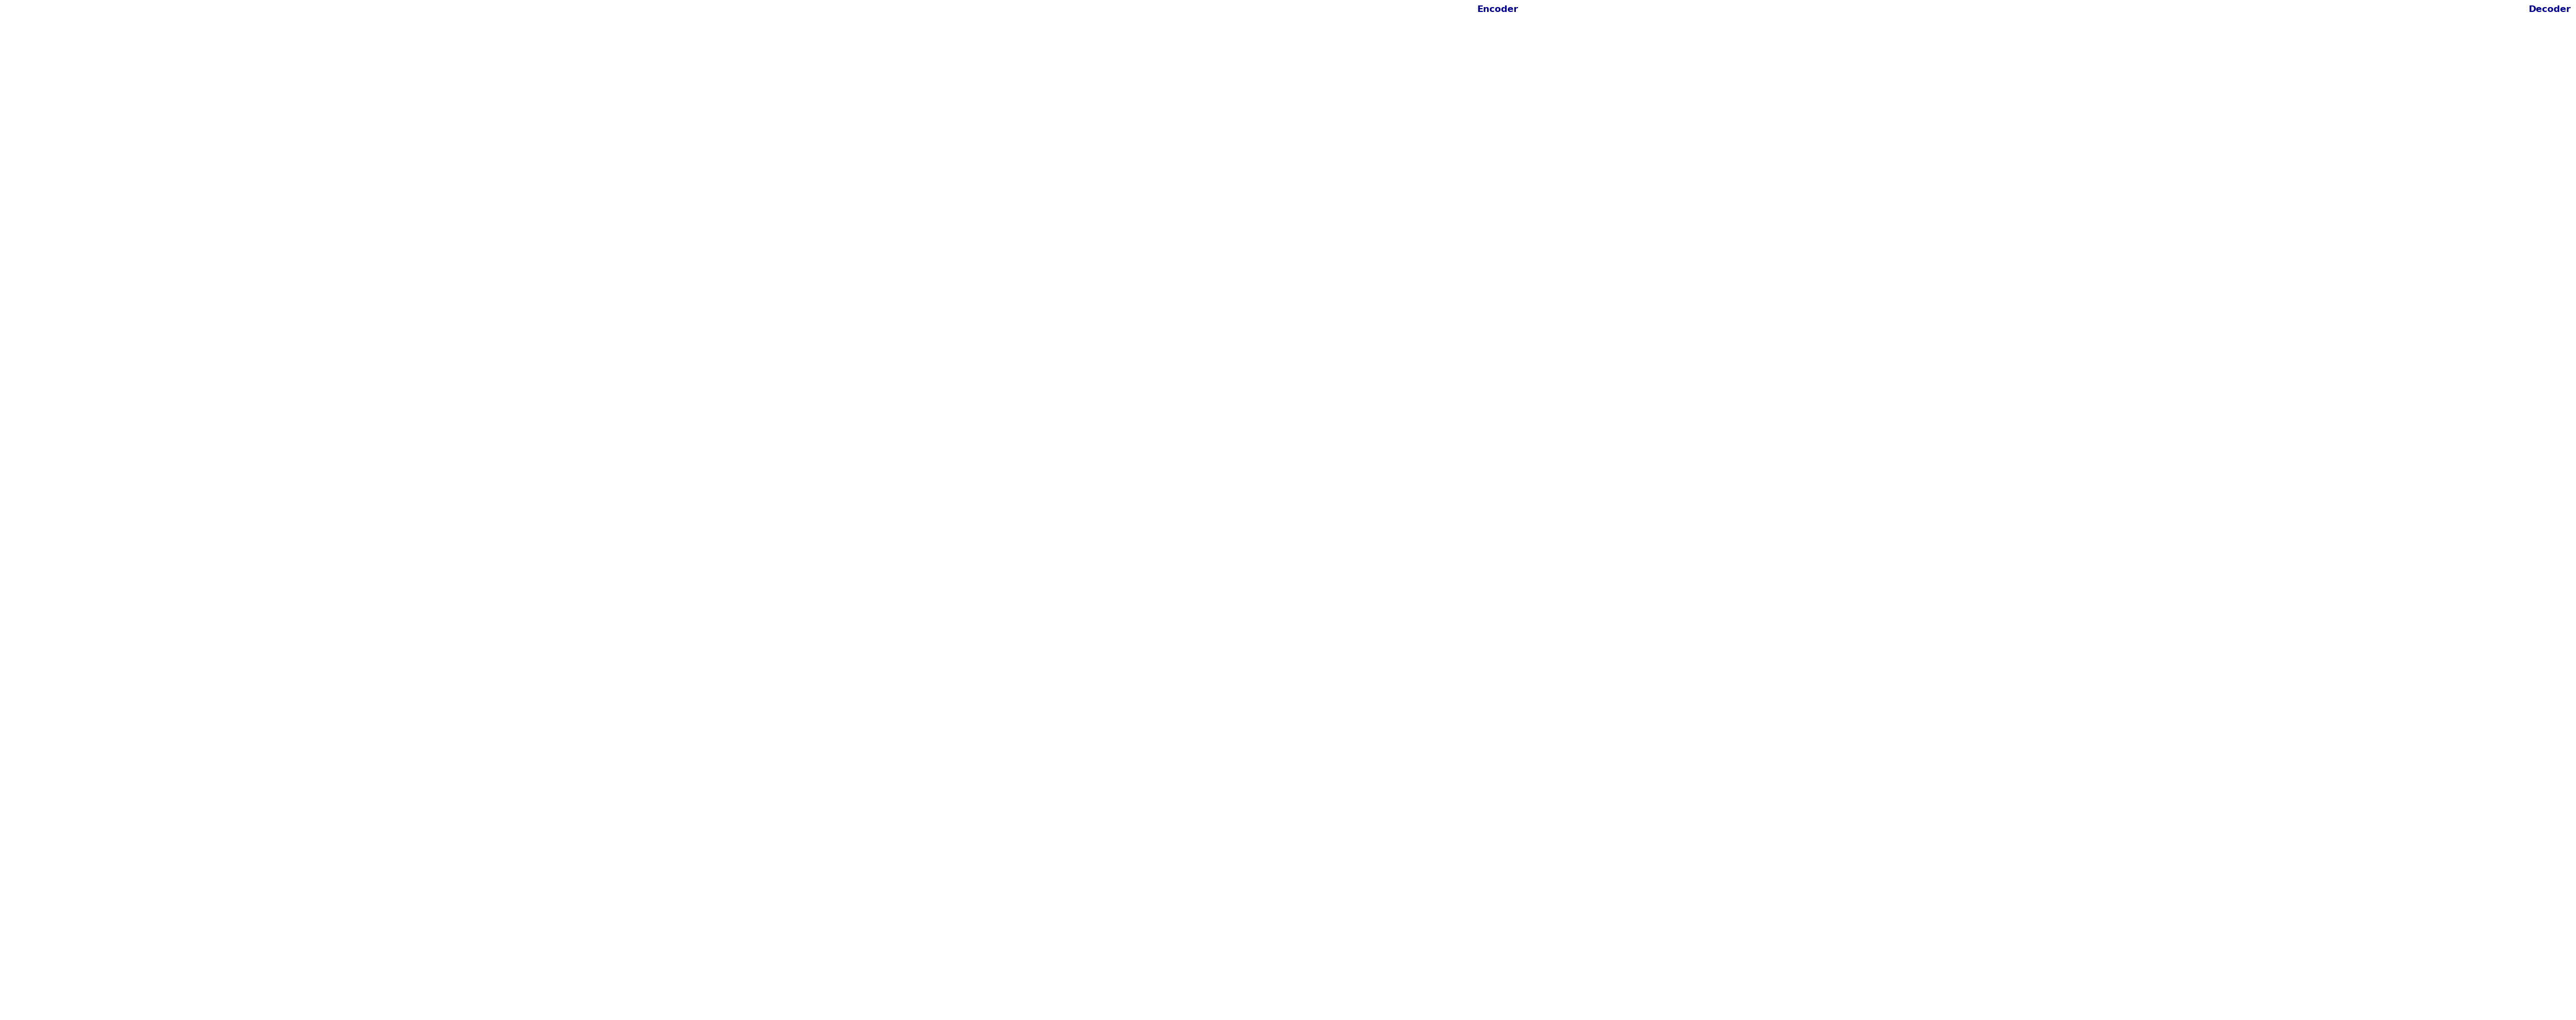

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 5))

# Encoder layers
ax.add_patch(patches.FancyBboxPatch((1, 3), 1, 2, boxstyle="round,pad=0.1", color='skyblue', label='Input Layer'))
ax.add_patch(patches.FancyBboxPatch((2.5, 3.5), 1, 1, boxstyle="round,pad=0.1", color='lightgreen', label='Hidden Layer 1'))
ax.add_patch(patches.FancyBboxPatch((4, 4), 0.5, 0.5, boxstyle="round,pad=0.1", color='orange', label='Latent Space'))

# Decoder layers
ax.add_patch(patches.FancyBboxPatch((5.5, 3.5), 1, 1, boxstyle="round,pad=0.1", color='lightgreen', label='Hidden Layer 2'))
ax.add_patch(patches.FancyBboxPatch((7, 3), 1, 2, boxstyle="round,pad=0.1", color='skyblue', label='Output Layer'))

# Arrows
ax.annotate('', xy=(2.5, 4), xytext=(2, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(4, 4.25), xytext=(3.5, 4.25),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(5.5, 4.25), xytext=(4.75, 4.25),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(7, 4), xytext=(6.5, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.text(3.5, 4.8, 'Encoder', fontsize=12, fontweight='bold', color='darkblue')
ax.text(6, 4.8, 'Decoder', fontsize=12, fontweight='bold', color='darkblue')

plt.axis('off')
plt.show()


In [13]:
import yaml

# Load the hyperparameters from the hparams.yaml file
hparams_path = 'lightning_logs/m1_vae/version_0/hparams.yaml'  # Replace with the correct path
with open(hparams_path) as file:
    hparams = yaml.safe_load(file)

print(hparams)  # To inspect the hyperparameters


{'dropout_rate': 0.2, 'hidden_dims': [2048, 1024, 512], 'input_dim': 451747, 'latent_dim': 256, 'lr': 1e-06}


In [16]:
from pytorch_lightning import Trainer

checkpoint_path = "lightning_logs/m1_vae/version_0/checkpoints/m1-vae-epoch=21-val_loss=0.96.ckpt"
vae_model = VAE_Lightning.load_from_checkpoint(
    checkpoint_path,
    map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    **hparams
    )

vae_model.eval()

VAE_Lightning(
  (model): VAE(
    (encoder_layers): Sequential(
      (0): Linear(in_features=451747, out_features=2048, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=2048, out_features=1024, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=1024, out_features=512, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.2, inplace=False)
    )
    (fc_mu): Linear(in_features=512, out_features=256, bias=True)
    (fc_logvar): Linear(in_features=512, out_features=256, bias=True)
    (decoder_layers): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=512, out_features=1024, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=1024, out_features=2048, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.2, inplace=False)
    )
    (

In [92]:
def get_latent_embeddings(model, dataloader):
    embeddings = []
    labels = []
    with torch.no_grad():
        for batch in dataloader:
            x,y = batch

            x = x.to(device)
            y = y.to(device)
            
            # Replace NaNs with zero or another neutral value for forward pass
            x_filled = replace_nan_with_mean(x)
            # x_filled = torch.nan_to_num(x, nan=0.0)
            
            z, _, _ = model.forward(x_filled)
            embeddings.append(z)
            labels.append(y)
        
        embeddings = torch.cat(embeddings, dim=0)
        labels = torch.cat(labels, dim=0)

    return embeddings, labels

train_embeddings, train_labels = get_latent_embeddings(vae_model, train_loader)
val_embeddings, val_labels = get_latent_embeddings(vae_model, val_loader)
test_embeddings, test_labels = get_latent_embeddings(vae_model, test_loader)

        